In [1]:
import pandas as pd 
import numpy as np 
import sklearn 


In [3]:
df = pd.read_csv("apples_and_oranges.csv")

In [4]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [6]:
df.shape

(40, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


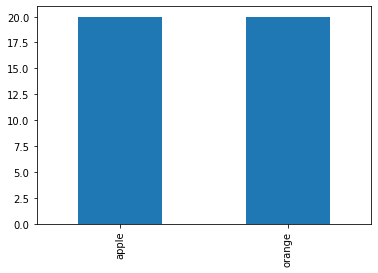

In [8]:
#
df.Class.value_counts().plot.bar()

In [10]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [14]:
#Classifying the predictors and target
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values
Y_train

array(['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple',
       'apple', 'orange', 'apple', 'apple', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'apple', 'apple', 'orange', 'apple',
       'apple', 'orange', 'orange', 'orange', 'orange', 'apple', 'apple',
       'orange', 'apple', 'apple', 'apple'], dtype=object)

In [16]:
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
# Base estimator by default Decison Tree with Max depth = 1 
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=1)

In [18]:
#Predicting the classes for test set
Y_pred = adaboost.predict(X_test)
Y_pred


array(['orange', 'orange', 'apple', 'orange', 'orange', 'apple', 'orange',
       'apple'], dtype=object)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)


Accuracy Of AdaBoost For The Given Dataset :  1.0


In [21]:
# We Understand that boosting model will learn from each other 
# Adaboost Gives Us 100 percent accuracy 
